In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import expon, poisson
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
space = np.arange(100)
exp = lambda x : np.exp(x)
exp_space = exp(space)
rand_range = np.random.rand(100)
plt.figure(figsize=(20,12))
plt.plot(exp_space)

# Trading Ideas
* Split Buys and Sells into two Hawkes Processes - indicative of market activity and a trade opportunity
* Trade execution - execute when lowest probability of adverse selection
* What events are discrete? Guidance cuts - likelihood of arrival of guidance cut from one company in sector given one company cuts - macro vs. idiosyncratic indicator - long-termism trade here would be a buying opportunity if sector dives on guidance cut from one when probability suggests renewal process ratio low

# Point Process
* A point process **keeps track of when random events occur over a time window**
* Examples: Lightning strikes, earthquakes, order fills
* Formally: Process $\displaystyle{ \mathrm{N}}$ is a function outputting an integer of the number of points occurring in $\displaystyle{ \mathrm{A} \subset \mathrm{S}}$ where S is a metric space
* For finance purposes, the metric space is a *temporal point process*, with all events occurring between 0 and T
* Data structure wise, this is a series of time stamps $\displaystyle{\{t_{1},t{2},...,t_{n}\}}$ which generates the sequence $\displaystyle{\{u_{i} = t_{i} - t_{i-1}\}}$ of time between events
* $\displaystyle{N(t)}$ is the number of events to have occurred by time $\displaystyle{t; t \leq T, N(t) \geq 0}$
* Some obvious other properties from following - monotonically increasing, jump discontinuities at point arrival.
* A **marked point process** is one containing multiple variables per point (e.g. time of trade, volume of trade, price of trade)

# Distribution & Density
* Exponential distribution and density function define variables in Poisson Point Process…

Text(0.5, 1.0, 'Exponential CDF')

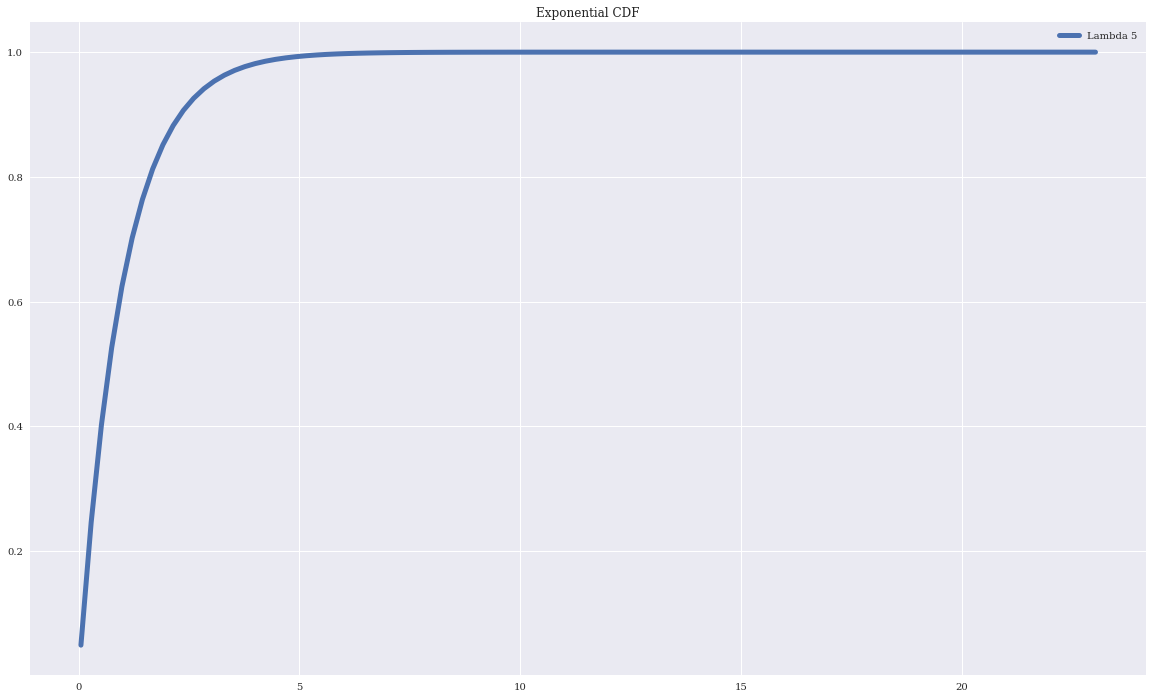

In [28]:
x = np.linspace(expon.ppf(0.01, scale=5),expon.ppf(0.99, scale=5), 100)
curve_lamb_five = expon.cdf(x, loc=0)
plt.figure(figsize=(20,12))
plt.plot(x, curve_lamb_five, lw=5, label='Lambda 5')
plt.legend(loc='best')
plt.title('Exponential CDF')

Text(0.5, 1.0, 'Exponential PDF with Lambda = 5')

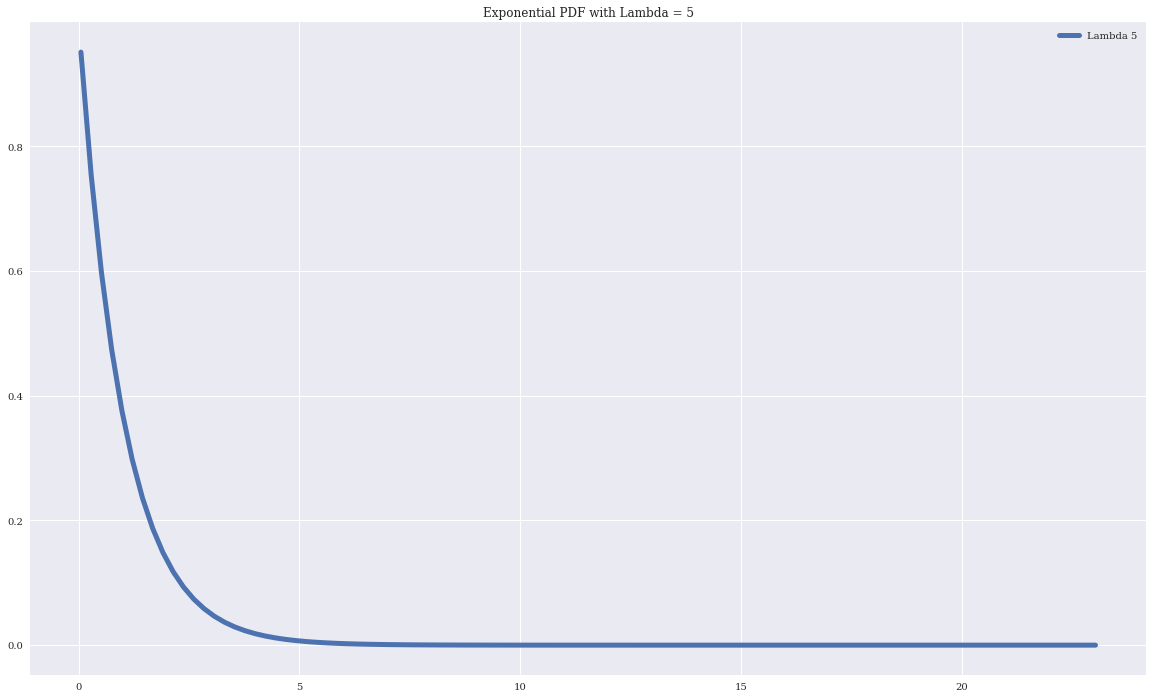

In [75]:
pdf_lamb_five = expon.pdf(x, loc=0)
plt.figure(figsize=(20,12))
plt.plot(x, pdf_lamb_five, lw=5, label='Lambda 5')
plt.legend(loc='best')
plt.title('Exponential PDF with Lambda = 5')

# Poisson Process
* Formally: Let $\displaystyle{\tau_{1}, \tau{2}...}$ be independent exponential variables, and $\displaystyle{T_{n} = \tau_{1} + \tau_{2} + ... + \tau_{n}}$ for $\displaystyle{n \geq 1}, T_{0} = 0$, and $\displaystyle{N(s) = max\{n: T_{n} \leq s\}}$
* So, at any point in continuous time t, N(t) returns a constant of events having arrived dependent on the lambda parameter (a *homogenous Poisson Process*), i.e. the *max* in the above is the number of events that have arrived by time T
* All increments of a Poisson process can be evaluated without iterating over previous events, so are independent.
* Formally, if: $\displaystyle{N(0) = 0, N(t + s) - N(s) = Poisson(\lambda t), N(t)}$ is discrete, than N(s) is a Poisson Process

Text(0.5, 1.0, 'Poisson Probability Mass Function w/ Lambda=5')

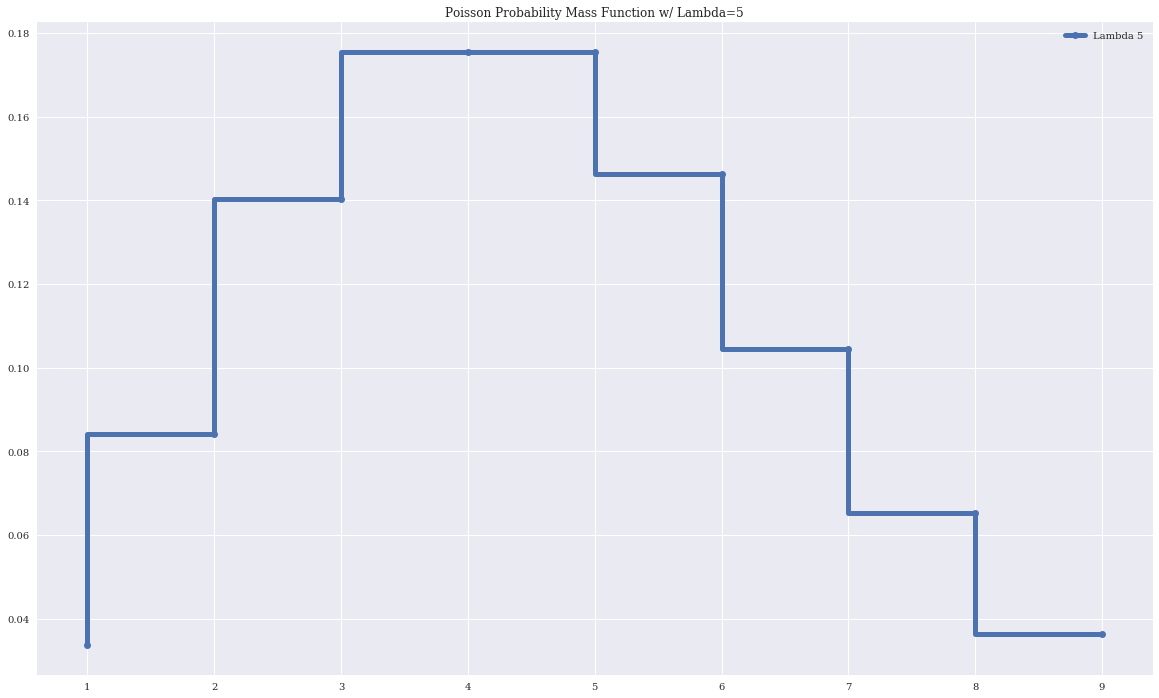

In [74]:
pois_x = np.arange(1,10)
pois_pmf = poisson.pmf(pois_x, mu=1)
pois_pmf_three = poisson.pmf(pois_x, mu=3)
pois_pmf_five = poisson.pmf(pois_x, mu=5)
plt.figure(figsize=(20,12))
# plt.plot(pois_pmf, label='Lambda 1', lw=5)
# plt.plot(pois_pmf_three, label='Lambda 3', lw=5)
# plt.plot(pois_pmf_five, label='Lambda 5', lw=5)
plt.step(x=pois_x, y=pois_pmf_five, label='Lambda 5', marker='o', lw=5)
plt.legend(loc='best')

plt.title('Poisson Probability Mass Function w/ Lambda=5')


# Non-Homogenous Poisson Process

* The model described above is flawed in finance applications in that arriving events are conditional on previous events
* To account for this, we introduce a **Non-Homogenous Poisson Process** where $\displaystyle{\lambda}$ varies.
* Formally: $\displaystyle{\{N(s); s \geq 0\}}$ is a Poission process with rate $\displaystyle{\lambda}$ iff:


1. $\displaystyle{N(0) = 0}$
2. $\displaystyle{N(t)}$ has discrete increments
3. $\displaystyle{N(t) - N(s)}$ is Poisson with mean $\displaystyle{\int_{s}^t \lambda(r) dr}$ where $\displaystyle{ \lambda(t)}$ represents the infinitesimal at which events will occur in neighborhood of t (think probability density function)
4. Another way of stating this is that the $\displaystyle{ \lambda(t)}$ value is the value a sample has to be greater than to generate a point in the process
5. This rate is the **Conditional Intensity** of the Non-Homogenous Point Process
6. This rate can be estimated *Parametrically or Non-Parametrically* - with or without external constraints to allow the intensity to fit the process modeled
7. The **Compensator** $\displaystyle{A(t)}$ is the integral of the conditional entity from 0 to t, i.e. the full memory of the process needed to iterate forward


# Renewal Process
* A *renewal process* is one where the inter-event sequence $\displaystyle{\{u_{i} = t_{i} - t_{i-1}\}}$ of time between events are independent random variables
* Therefore each interval has its own density function, now as *renewal density* functions
* This creates a model where the probability of an event depends only on the time since the most recent event
* This process along with Compensator allows for the generation of a point process with varying intensity from origin to time t

# Self-Exciting and Self-Correcting Processes
* The arrival of an event in a process can either raise the likelihood of more events **(Self-Exciting)** or lower the likelihood **(Self-Correcting)** - formally this is a function of covariance
* Self-Exciting: $\displaystyle{cov\{N(s,t), N(t,u)\} > 0}$ for $\displaystyle{s < t < u}$
* Self-Correcting: $\displaystyle{cov\{N(s,t), N(t,u)\} < 0}$ for $\displaystyle{s < t < u}$
* A Poisson process is neither of these by definition, but $\displaystyle{ \lambda(t) }$ can be modified to produce this

# Hawkes Process
* A Hawkes Process is a **point process with a kernel function $\displaystyle{\phi(t - t_{i})}$ which reflects the influence of past events over the present**
* This process is the point process equivalent to the autogressive model on time series
* So for a counting process, given the filtration space $\displaystyle{F_{t-} = \{t_{1}, ..., t_{i}\} : \forall i < F(t)}$ `All events up to time t`, the Hawkes process **has conditional intensity defined by the expected rate at time t given process N before.**
* Continuous Hawkes Process Formula: $\displaystyle{\lambda(t | F_{t-}) = \mu(t) + \int_{\infty}^t \phi(t-s)dN(s)}$
* $\displaystyle{\mu(t)}$ represent *exogenous (idiosyncratic/immigrant) contribution to the process*
* The integral represents the *Self-Exciting or Self-Correcting features of the process* - these features are **descendents** of the initial **immigrant** contribution
* In discrete form,the Hawkes process is: $\displaystyle{\lambda(t | F_{t-}) = \mu(t) + n \sum_{t_{t} < t} h(t - t_{i})}$ `h(t) is called the bare kernel, h(t) generated with Dirac delta over defined Poisson space`
* h(t) is a probability density function in the neighborhood of t
* It follows that **if $\displaystyle{n < 1}$, the process is stationary, n = 1 criticality point, n > 1 supercritical state** (unachievable in markets we hope)
* If the process is stationary and $\displaystyle{X_{1}}$ and $\displaystyle{X_{2}}$ are independent copies of a random variable and $\displaystyle{a, b > 0}$, then $\displaystyle{aX_{1} + bX_{2}}$ and $\displaystyle{cX + d}$ have the same distribution for some $\displaystyle{c, d > 0}$

# Average Total Intensity of Hawkes Process
* Assuming stationarity and taking $\displaystyle{u(t)}$ to be a constant, the Average Total Intensity is: $\displaystyle{\Lambda = E[\lambda(t | F_{t-)}] = E[\mu + \int_{-\infty}^t \phi(t-s) dN(s)] = \mu + \Lambda \int_{0} ^ \infty} \phi(\tau) d(\tau)$ `i.e. initial condition + average value of conditional intensity over lifetime of process`
* This implies that $\displaystyle{\Lambda = \mu/1 - n}$


# Branching Ratio
* $\displaystyle{n = \int_{0}^\infty \phi(t) dt}$ `Positive definite integral of conditional intensity with respect to time`
* Intuitively, the branching ratio represents the number of child events that will spawn from the initial immigrant.
* If Ratio = 0, it's not a Hawkes process anymore, it goes back to being a vanilla Poisson

# Kernel Candidates for Hawkes Processes
* **Intuitively** - time series kernels reflect the state of decay of the influence of past events on future events
* We'll first consider the *exponential kernel* and *power kernel* - the exponential decays far faster so is appropriate for short-memory processes
* Arguments for Exponential Kernel: Markov property of financial assets, previous price movements have low impact, High Frequency Trading
* Arguments for Power Kernel: Longer time span price correlations, Longer time horizons

# Exponential Kernel
* Early in the development of the Hawkes process, focus was on the exponential kernel: $\displaystyle{\phi(t - t_{i}) = \alpha \exp^{-\beta (t - t_{i})}}$
* This leads to the conditional intensity \$displaystyle{\lambda_{t} = \mu_{t} + \sum_{t_{i} < t} \alpha \exp^{-\beta (t - t_{i})}}$
* This resembles the autogregressive model. Consider the intensity at a past time $\displaystyle{t_{i}}$. The intensity is then $\displaystyle{\lambda(t_{i}) - \mu_{t_{i}} = \mu_{t} + \sum_{t_{k} < t_{i}} \alpha \exp^{-\beta (t - t_{i})}}$ where $\displaystyle{t_{k}}$ is all events before $\displaystyle{t_{i}}$

* Multiply both sides by $\displaystyle{\exp^{-\beta(t-t{i)}}}$ = $\displaystyle{[\lambda(t_{i}) - \mu_{t_{i}}]\exp^{-\beta(t-t_{i)}} = \sum_{t_{k} < t_{i}} \alpha \exp^{-\beta(t-t_{k})}}$ i.e. the Sum of kernel function for all events occuring between $\displaystyle{t_{i}}$ and t
* Now the response function decomposes into the sums: $\displaystyle{\sum_{t_{i} < t} \alpha \exp^{-\beta(t - t_{i})} = \sum_{t_{k} < t_{i}} \alpha \exp^{-\beta(t - t_{k})} + \sum_{t_{k} > t_{i} < t} \alpha \exp^{-\beta(t - t_{k})}}$ e.g. summing the kernel of the events that occurred before $\displaystyle{t_{i}}$ and the events that occurred between $\displaystyle{t_{i}}$ and t
* Combining the previous two functions we get: $\displaystyle{\lambda(t) - \mu(t) = [\lambda(t_{i} - \mu(t_{i}]\exp^{-\beta(t - t_{i})} + \sum_{t_{k} > t_{i}} \alpha \exp^{-\beta (t - t_{k})}}$
* Which pretty closely resembles continuous form of autogregressive model: $\displaystyle{X_{t} - \mu = \exp^{-\beta(t-s)} (X_{s} - \mu)}$ + sum of innovations, with the first term representing the linear autoregressive function and the second term representing innovations/noise/ $\displaystyle{\epsilon}$
* The **Average Total Intensity** when using the **Exponential kernel** is: $\displaystyle{E(\lambda) = E(\mu) + E[\int_{-\infty}^{t}] \alpha \exp^{-\beta (t-s)} dN(s) }$
* Assuming stationarity, the **Expect Intensity** is: $\displaystyle{E[\lambda] = \mu/(1 - \alpha/\beta)}$ `Remember that alpha is priming factor, beta is decay rate, mu is exogenous impulse`
* The alpha/beta ratio drives the point process because of the semidefinite integral exponential identity: $\displaystyle{n = \int_{0}^\infty \alpha \exp^{-\beta t} dt = \alpha/\beta}$

# Other Kernels
* Observing event distribution gives us clues as to what kernel to use - other good options for Hawkes Process Kernels are the Power Law Kernel and, in between the Exponential and Power in terms of decay rate are the *Cut-Off Kernel* and the *Double Exponential Kernel*

# Power Law Kernel
* $\displaystyle{\phi pow(t) = n \theta c^\theta / (t+c)^{1 + \theta} \chi(t)}$ - $\displaystyle{\chi}$ here is the unit step/Heaviside function - defined as 1 where $\displaystyle{t \geq 0}$ and 0 elsewhere
* A rewrite of the exponential kernel to include the unit step function: $\displaystyle{\phi \exp(t) = n/\tau \exp(-t/\tau) \chi(t)}$

# Cut-Off Kernel
* $\displaystyle{\phi cut(t) = n \epsilon \tau_{0} / t^{1+\epsilon} \chi(t - \tau_{0})}$ `Kagan and Knopoff Earthquake distribution article, 1981`

# Double Exponential Kernel
* $\displaystyle{\phi de(t) = (\alpha_{1} \exp(-t/\tau_{1}) + \alpha_{2} \exp(-t/\tau_{2})) \chi(t)}$

# Analysis of Point Clusters
* Clusters emerge from an initial immigrant, like economic events or external news; examples: Twitter retweets, Youtube views, earthquakes
* How do we determine the boundaries separating clusters? 
* A **renormalized kernel** describes the response of points within a cluster to the initial immigrant - contrast this to the **bare kernel**, which just describes the probability of a mother triggering a daughter event
* The relationship between a bare kernel $\displaystyle{h(t)}$ and a renormalized kernel $\displaystyle{R(t)}$ is governed by the equation $\displaystyle{h(t) = R(t) - n \int_{0}^t h(t-s) R(s)ds}$
* Example: Renormalized kernel for the exponential kernel: $\displaystyle{R(t) = 1/\tau \exp(-t (1-n) / \tau)}$
* $\displaystyle{\tau}$ is the decay constant in the above, see: https://en.wikipedia.org/wiki/Exponential_decay
* The renormalized kernel is not a Probability Density Function, but rather: $\displaystyle{\int_{0}^\infty R(t) dt = 1 / (1-n)}$
* Putting these together, we can calculate 1. The *average distance between immigrants* and 2. The *average length of a cluster*
* Assuming immigrants are generated from a **homogenous Poisson process** of intensity $\displaystyle{\mu}$ the average distance between points is $\displaystyle{1/\mu}$, while the occurrence of descendents is defined by $\displaystyle{1/\tau \exp(-t (1 - n) / \tau)}$
* So the average cluster length is the semi-definite integral: $\displaystyle{\int_{0}^\infty t (1-n) R(t) dt = \int_{0}^\infty ((1-n)/ \tau) t \exp(- ((1-n)/\tau) t) dt = \tau/ 1 - n}$
* The $\displaystyle{1 - n}$ factor in all of the above accounts for the renormalized kernel not being a PDF
* With all this in place, we introduce the factor ${\kappa}$, the **ratio between the average length of the cluster and average distance between immigrants**
* If ${\kappa < 1}$, the clusters have space between the end of them and arrival of next immigrant and so are well separated
* Conversely if ${\kappa \geq 1}$, then there is overlap between the end of a cluster and the next immigrant arriving
* Finally - the ${\kappa}$ value for the renormalized exponential kernel is ${\kappa = (\tau / (1 - n)) / (1/ \mu) = \mu \tau / (1 - n)}$

# Simulating a Hawkes Process
* Two approaches: the **thinning process** and **parallel generation**
* The **Thinning Process** works by generating data points ${t_{1} ... t_{n}}$ for a homogenous Poisson process with intensity ${\lambda_{maj}}$ being _majorant_ (i.e. generating greater than or equal to) the number of points generated by the condition intensity ${\lambda_{t}}$ of the process being simulated
* These points are then filtered with probability value - ${\lambda(t_{i})/ \lambda_{maj}}$ - so the raw Poisson number of points are further filtered to this intensity
* Two downsides to this method: runs in O(N^2) time and ignores the immigrant-child **branching process** as well as simultaneous immigrant/child occurrence
* The **Parallel Generation** process runs by simultaneously simulating all immigrant events (and labeling them as such!) from a Poisson process with intensity ${\lambda(t)}$ equal to background (exogenous) intensity of the Hawkes process ${\mu}$ - from this an iterative process of T generations runs simulating generation of child events from each immigrant event using ${\lambda_{i}(t) = \phi(t - t_{i})}$, for the first iteration ${\lambda_{k, i}(t) = \phi_{k, i}}$ for future generations up to generation T *or* no events being generated by any children. An additional benefit is this giving the change to label the generation each event is spawned from to understand process decay.

# Kernel Estimation
